<a href="https://colab.research.google.com/github/shreyash0502/MLmodels/blob/main/Task2_unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>This is my project for prediction using Unsupervised Machine Learning.</h1>

```
#Here, I will implement the K-means clustering ML algorithm for my model.
```


---









First, we import all the necessary libraries for developing the K-means clustering model.

---
```
# Here, we will use the sci-kit learn python library.
# We will also use python libraries- pandas(for data formatting and manipulation) and numpy(for array manipulation).
# Finally, I will use matplotlib library for visualization. 
```






In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics, datasets


Now, we will import the iris dataset in our project and extract features and labels from it. 

---



In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
display(iris_df.head(5))
y = iris.target
#print(np.shape(y))
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully!")
X = iris_df.iloc[0:].values

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Data imported successfully!


Visualization of data is an important aspect. With visualization, we can understand better and develop human insights like developing trends and patterns in data. 

Now, we will visualize the data.

---



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


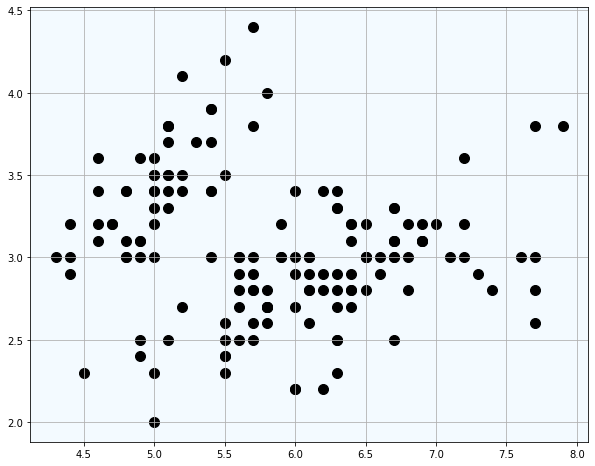

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], s = 100, c = 'black')
plt.grid()
ax = plt.axes()
ax.set_facecolor("#f3faff")
plt.show()

Choosing the most efficient k, i.e, number of clusters can be tricky and completely depends on the nature of data distribution. So, we will use the "Elbow method" to find the correct value of k. Code is shown below: 


---



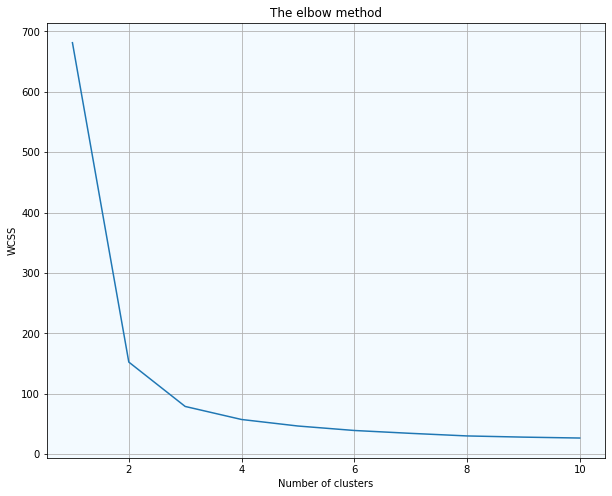

In [ ]:

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(10,8))
ax = plt.axes()
ax.set_facecolor("#f3faff")
plt.grid()
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()
#print(np.shape(X))

Now, we have successfully imported the data and visualized it. We can now train our K-Means model as shown below. 

Number of clusters chosen = 3

---

We will then plot the clusters with different colors. We can't compare the test cases with prediction directly because assigning a number to a cluster is completely arbitrary. So, there are other methods to evaluate our model's performance which will be discussed in a later section.

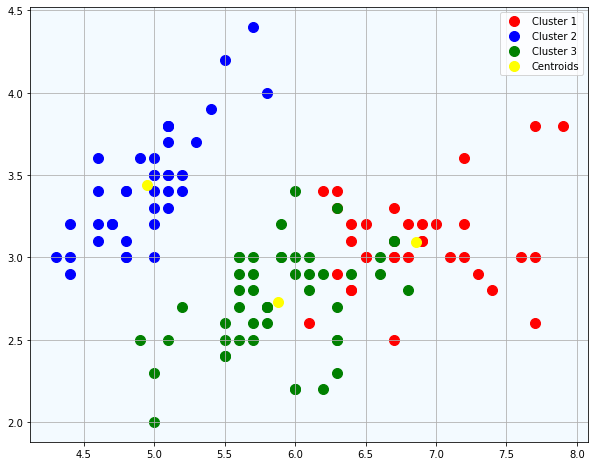

In [ ]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#kmeans.fit(X_train)
y_kmeans = kmeans.fit_predict(X_train)
y_pred = kmeans.predict(X_test)
plt.figure(figsize=(10,8))
ax = plt.axes()
ax.set_facecolor("#f3faff")
plt.grid()
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()
#print(y_kmeans)
#y

We can evaluate the performance of the model based on the normalized mutual information score. Code is shown below:


---



In [ ]:
from sklearn.metrics import normalized_mutual_info_score
print("accuracy: ", normalized_mutual_info_score(y_test, y_pred))

accuracy:  0.7762445166809027
